# Multi-Armed Bandits

**1.**  
Definition:  

$$R_n = n \mu^* - \mathbb{E} [\sum_{t=1}^n X_t (I_t)] , \quad
\mu^* = \max_{1\le i \leq K}\mu_i \\
T_i (n)= \sum_{t=1}^n \mathbb{1}_{I_t = i} ,\quad
\Delta_i = \mu^* - \mu_i
$$ 


Claim:  
$$R_n = \sum_{i=1}^K \Delta_i \mathbb{E} [ T_i(n) ]$$

Remark:
$\mathbb{E} [ T_i(n) ] = \mathbb{E} (\sum_{t=1}^n \mathbb{1}_{I_t = i})$ is the number of $i$-th arm.  


Proof:  
$$\begin{align*}
\sum_{i=1}^K \Delta_i \mathbb{E} [ T_i(n) ] &= \sum_{i=1}^K (\mu^* - \mu_i ) \#\{i-th \ arm\} \\
 &= n \mu^* - \sum_{i=1}^K \mu_i \#\{i-th \ arm\}\\
 &= n \mu^* - \sum_{t=1}^N \mu_{I_t} \\
 &= n \mu^* - \sum_{t=1}^N \mathbb{E}(X_t (I_t)) \\
 &= n \mu^* - \mathbb{E} (\sum_{t=1}^N X_t (I_t)) \\
 &= R_n
\end{align*}$$

**2.**

In [1]:
import numpy as np

In [2]:
class BernoulliBandit:
    def __init__(self, means):
        self.means = means
        self.arms_chosen = [0, 0] #nb d'actions choisies
        self.regret_cumule = 0

    def pull(self, I: 0 or 1):
        value = np.random.binomial(1, self.means[I])
        self.regret_cumule = self.regret_cumule + max(self.means) - value
        self.arms_chosen[I] = self.arms_chosen[I] + 1
        return value

## The Follow the leader algorithm (FTL)

** 3. **

In [9]:
def myargmax(l :list) -> "indice of maximum":
    """Tie will be broken randomly."""
    m = max(l)
    ind = []
    for i in range(len(l)):
        if l[i] == m:
            ind.append(i)
    return np.random.choice(ind)
##More compact choice:    
#     a = np.array(l)
#     return np.random.choice(np.where(a == max(a)))

In [10]:
class FTLBandit(BernoulliBandit):
    def __init__(self, means):
        BernoulliBandit.__init__(self, means)
        self.nu_hat = [0,0]
        
    def pull(self):
        I = myargmax(self.nu_hat)
        value = BernoulliBandit.pull(self, I)
        ti = self.arms_chosen[I]
        self.nu_hat[I] = ti/(ti + 1) * self.nu_hat[I] + value/(ti+1)
        return value

**4. and 5.**

In [11]:
import matplotlib.pyplot as plt

In [12]:
means = [0.6, 0.5]
regret = []
for __ in range(1000):
    bandit = FTLBandit(means)
    for _ in range(100):
        bandit.pull()
    regret.append(bandit.regret_cumule)

(array([  6.,  29., 106., 137., 176., 186., 134., 146.,  63.,  17.]),
 array([-15. , -11.3,  -7.6,  -3.9,  -0.2,   3.5,   7.2,  10.9,  14.6,
         18.3,  22. ]),
 <a list of 10 Patch objects>)

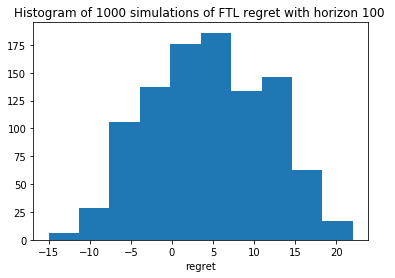

In [13]:
plt.title("Histogram of 1000 simulations of FTL regret with horizon 100 ")
plt.xlabel("regret")
plt.hist(regret)

The regret is concentrated in [0, 10]. We see usually $\sqrt{T \log{K}}$ in the qualification of bound. They correspond intuitively.  
There is some negative regret because sometimes our choice is "better" than the best choice: if we only choose the best option $\mu_2$, our regret will be 0. But it is possible to choose another arm with a higher value than the 2-th arm's at some round. In expectation the value is lower and it means generally it is not a good option but not always. If we know analytically the exact form of $X_1, X_2$, we can even get a regret more and more negative!

In [59]:
np.sqrt(np.log(2)*100)

8.325546111576978

**6.**

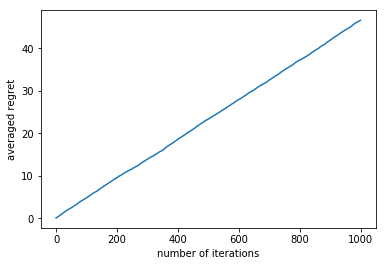

In [41]:
regret = np.zeros(1000)
for __ in range(1000):
    bandit = FTLBandit(means)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

**7.**  
I think it is still a good algorithm: the averaged regret is linear.

## The Explore-then-Commit algorithm (ETC)

** 8.**

In [36]:
class ETCBandit(BernoulliBandit):
    def __init__(self, means, m:"number of exploration"):
        BernoulliBandit.__init__(self, means)
        
        #building nu hat
        self.nu_hat = [0,0]
        for t in range(2*m):
            I = t%2
            value = BernoulliBandit.pull(self, I)
            ti = self.arms_chosen[I]
            self.nu_hat[I] = ti/(ti + 1) * self.nu_hat[I] + value/(ti+1)
            
        #re initialize
        self.arms_chosen = [0, 0] #nb d'actions choisies
        self.regret_cumule = 0
        
    def pull(self):
        I = np.argmax(self.nu_hat)
        value = BernoulliBandit.pull(self, I)
        return value

** 9.**  
If we don't count the cumulated regret in the phase of exploration, The bigger m is, the better m is.

In [51]:
regret_m = []
for m in [1, 2, 5, 10, 15, 20, 25, 30, 40]:
    regrets = []
    for i in range(1000):
        bandit = ETCBandit(means, m)
        for _ in range(100 - 2*m):
            bandit.pull()
        regrets.append(bandit.regret_cumule)
    regret_m.append(sum(regrets)/1000)

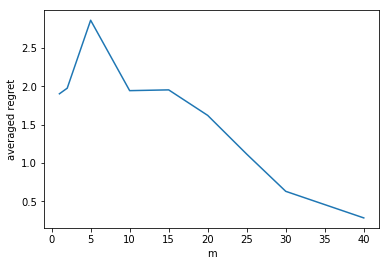

In [52]:
plt.xlabel("m")
plt.ylabel("averaged regret")
plt.plot([1, 2, 5, 10, 15, 20, 25, 30, 40], regret_m)

** 10.**

quitte à étendre l'horizon $n$ (ici, l'horizon est en effet $n+2m$):

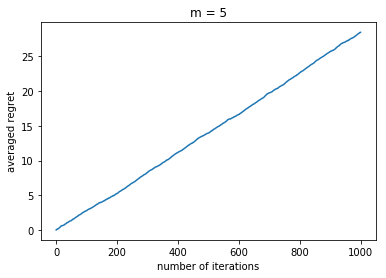

In [47]:
m = 5
regret = np.zeros(1000)
for __ in range(1000):
    bandit = ETCBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

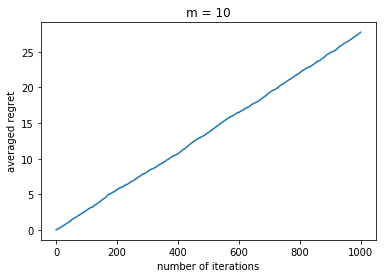

In [48]:
m = 10
regret = np.zeros(1000)
for __ in range(1000):
    bandit = ETCBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

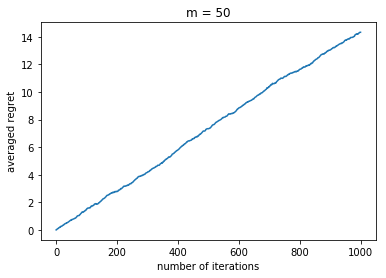

In [49]:
m = 50
regret = np.zeros(1000)
for __ in range(1000):
    bandit = ETCBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

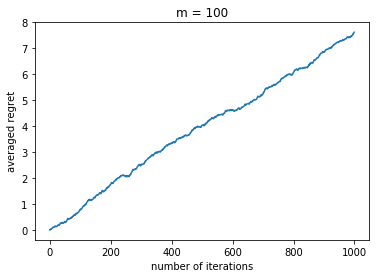

In [50]:
m = 100
regret = np.zeros(1000)
for __ in range(1000):
    bandit = ETCBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

I think it is a good algorithm: the regret is linear, and we can get a better decision maker (i.e. a smaller linear coefficient) by spending more time in exploration (i.e. with bigger m).

**11.**

**(a)**
In the phase of exploration, each arm is chosen $m$ times.  

After exploration, 
* if $\hat{\mu_i}$ is the maximum of all $\hat{\mu_i}$ (i.e. $\mathbb{P} \big(\hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big) = 1$), it will be chosen for each time. (so it will have $(n-2m)$ more).
* if not (i.e. $\mathbb{P} (\hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) ) = 0$), then it will be never chosen.

So 
$$\mathbb{E}[T_i(n)] = \underbrace{m}_{exploration} + \underbrace{(n-2m) \overbrace{\mathbb{P} \big(\hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big)}^{0 \ or\  1} }_{post-exploration}$$

**(b)** Claim: $$\mathbb{P} \big( \hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big) \leq \mathbb{P} \big( \hat{\mu_i}(2m) - \mu_i - (\hat{\mu_1}(2m) - \mu_1) \geq \Delta_i \big)$$
Proof:  
* if $\hat{\mu_i}$ is not the maximum of all $\hat{\mu_i}$ , then $\mathbb{P} \big( \hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big) = 0 \leq \mathbb{P} \big( \hat{\mu_i}(2m) - \mu_i - (\hat{\mu_1}(2m) - \mu_1) \geq \Delta_i \big)$ 
* if $\hat{\mu_i}$ is the maximum of all $\hat{\mu_i}$, then  
    * if $i=1$, then 
    $$\begin{align*}
    \mathbb{P} \big( \hat{\mu_i}(2m) - \mu_i - (\hat{\mu_1}(2m) - \mu_1) \geq \Delta_i \big) &= \mathbb{P} \big( \hat{\mu_1}(2m) - \mu_1 - (\hat{\mu_1}(2m) - \mu_1) \geq (\mu_1 - \mu_1) \big) \\
    &= \mathbb{P} (0 \geq 0)\\
    &=1\\
    &\geq \mathbb{P} \big( \hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big)
    \end{align*}$$
    * if $i=0$, then 
    $$\begin{align*}
    \mathbb{P} \big( \hat{\mu_i}(2m) - \mu_i - (\hat{\mu_1}(2m) - \mu_1) \geq \Delta_i \big) &= \mathbb{P} \big( \hat{\mu_0}(2m) - \mu_0 - (\hat{\mu_1}(2m) - \mu_1) \geq (\mu_1 - \mu_0) \big) \\
    &= \mathbb{P} (\hat{\mu_0}(2m) \geq \hat{\mu_1}(2m))\\
    &= \mathbb{P} \big( \hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big)\\
    &\geq \mathbb{P} \big( \hat{\mu_i}(2m) \geq \max_{j \neq i} \hat{\mu_j} (2m) \big)
    \end{align*}$$

## The Upper-Confidence-Bound algorithm (UCB)

**12.**

Here $n=2m$ for the number of exploration.

In [15]:
class UCBBandit(BernoulliBandit):
    def __init__(self, means, m:"number of exploration"):
        BernoulliBandit.__init__(self, means)
        
        #building nu hat
        self.nu_hat = [0,0]
        for t in range(2*m):
            I = t%2
            value = BernoulliBandit.pull(self, I)
            ti = self.arms_chosen[I]
            self.nu_hat[I] = ti/(ti + 1) * self.nu_hat[I] + value/(ti+1)
            
        #re initialize
        self.regret_cumule = 0
        
    def pull(self):
        I = np.argmax(np.array(self.nu_hat) + [np.sqrt(4*np.log(2*m)/self.arms_chosen[i]) for i in range(2)])
        value = BernoulliBandit.pull(self, I)
        return value

**13.**

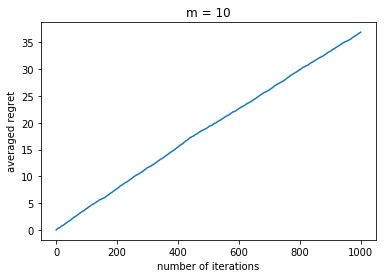

In [16]:
m = 10
regret = np.zeros(1000)
for __ in range(1000):
    bandit = UCBBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("UCB m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

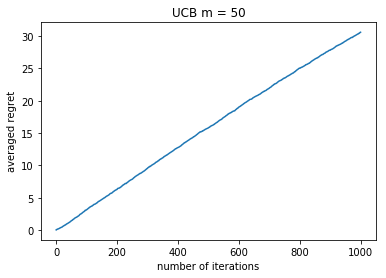

In [17]:
m = 50
regret = np.zeros(1000)
for __ in range(1000):
    bandit = UCBBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("UCB m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)

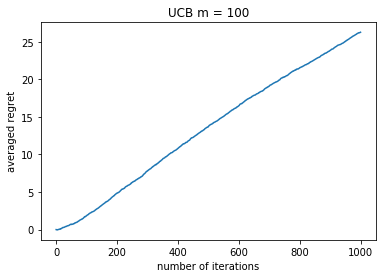

In [18]:
m = 100
regret = np.zeros(1000)
for __ in range(1000):
    bandit = UCBBandit(means, m)
    regret_t = []
    for _ in range(1000):
        bandit.pull()
        regret_t.append(bandit.regret_cumule)
    regret = regret + regret_t
regret = regret /1000    

plt.title("UCB m = " + str(m))
plt.xlabel("number of iterations")
plt.ylabel("averaged regret")
plt.plot(np.arange(1000), regret)